In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic/train.csv')

In [6]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df.loc[df['Embarked'].isnull()] # у двух пассажиров не заполнен порт - это должны сделать мы

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
df.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [14]:
df.groupby('Embarked').count()['PassengerId']

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [15]:
embarked = df.groupby('Embarked').count()['PassengerId']

In [18]:
embarked.max()

644

In [19]:
embarked[embarked == embarked.max()]

Embarked
S    644
Name: PassengerId, dtype: int64

In [20]:
embarked[embarked == embarked.max()].index[0]

'S'

In [22]:
embarked_max = embarked[embarked == embarked.max()].index[0]

In [23]:
df.loc[df['Embarked'].isnull(), 'Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [24]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max

In [26]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
df['Age'].median()

28.0

In [33]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')

In [36]:
df['Title'].sample(10)

178      Mr
120      Mr
411      Mr
308      Mr
542    Miss
517      Mr
49      Mrs
483     Mrs
852    Miss
142     Mrs
Name: Title, dtype: object

In [37]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [38]:
df.groupby('Title').count()['PassengerId']

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [39]:
mapping = {'Don': 'RoyaltyM', 'Mme': 'Miss', 'Ms': 'Miss',
    'Major': 'Officer', 'Lady': 'RoyaltyF', 'Sir': 'RoyaltyM', 
    'Mlle': 'Miss', 'Col': 'Officer', 'Capt': 'Officer',
    'Countess': 'RoyaltyF', 'Jonkheer': 'RoyaltyM'}
df.replace({'Title': mapping}, inplace=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'RoyaltyM', 'Rev', 'Dr', 'Officer',
       'RoyaltyF'], dtype=object)

In [40]:
df.groupby('Title').count()['PassengerId']

Title
Dr            7
Master       40
Miss        186
Mr          517
Mrs         125
Officer       5
Rev           6
RoyaltyF      2
RoyaltyM      3
Name: PassengerId, dtype: int64

In [41]:
df.groupby('Title')['Age'].median()

Title
Dr          46.5
Master       3.5
Miss        21.5
Mr          30.0
Mrs         35.0
Officer     56.0
Rev         46.5
RoyaltyF    40.5
RoyaltyM    40.0
Name: Age, dtype: float64

In [42]:
age_med = df.groupby('Title')['Age'].median()

In [43]:
for title, age in age_med.iteritems():
    filter_age = df['Age'].isnull()
    filter_title = df['Title'] == title
    df.loc[filter_age & filter_title, 'Age'] = age

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [46]:
df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [49]:
survived_pclass = df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')

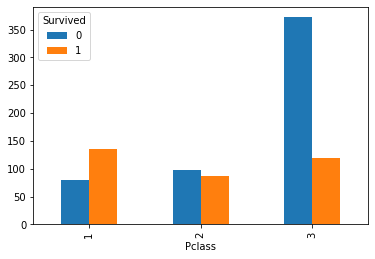

In [50]:
survived_pclass.plot(kind='bar')

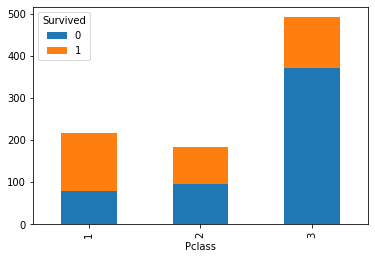

In [51]:
survived_pclass.plot(kind='bar', stacked=True)

In [52]:
survived_title = df.pivot_table(values='PassengerId', index='Title', columns='Survived', aggfunc='count')

In [54]:
survived_title

Survived,0,1
Title,,
Dr,4.0,3.0
Master,17.0,23.0
Miss,55.0,131.0
Mr,436.0,81.0
Mrs,26.0,99.0
Officer,3.0,2.0
Rev,6.0,NaN
RoyaltyF,NaN,2.0
RoyaltyM,2.0,1.0


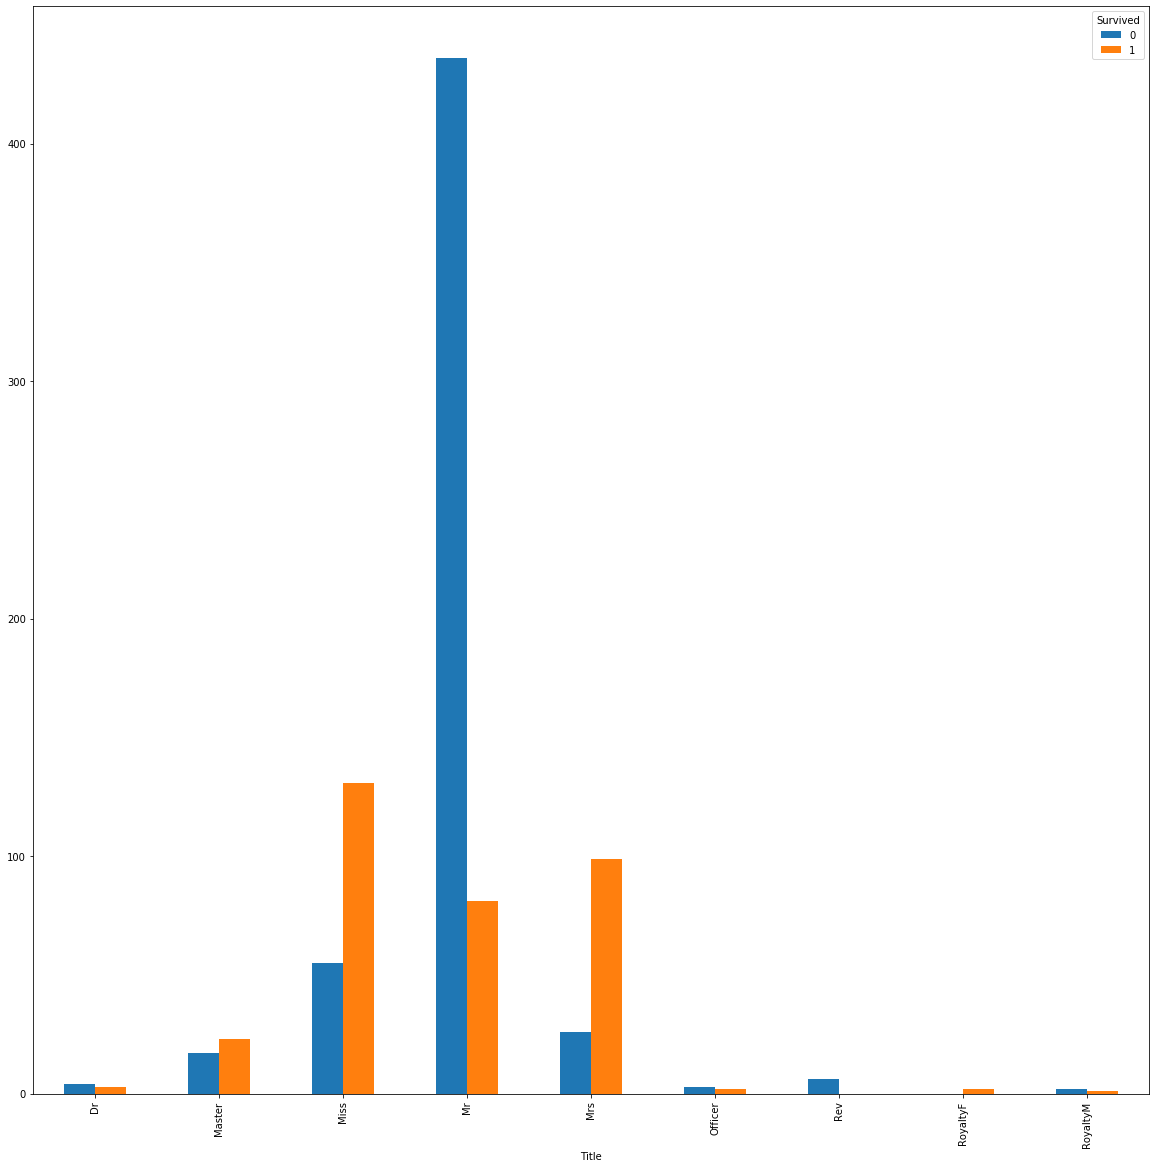

In [55]:
survived_title.plot(kind='bar', figsize=(20,20))